# Импорт библиотек

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import kaggle
import matplotlib
import matplotlib.pyplot as plt

# Информация о наборе данных

Как известно, привлечение нового клиента обходится гораздо дороже, чем удержание существующего.

Банкам важно знать, что подталкивает клиента к решению покинуть компанию.

Профилактика оттока позволяет компаниям разрабатывать программы лояльности и кампании по удержанию клиентов, чтобы сохранить как можно больше клиентов.

## Описание Переменных

RowNumber — соответствует номеру записи (строки).

CustomerId — id клиента.

Surname — фамилия клиента.

CreditScore — кредитный рейтинг.

Geography — местоположение клиента.

Gender — пол клиента.

Age — возраст клиента.

Tenure — количество лет, в течение которых клиент является клиентом банка.

Balance — баланс на счетах клиента.

NumOfProducts — количество продуктов, купленных клиентом через банк.

HasCrCard — наличие кредитной карты у клиента.

IsActiveMember — Активные клиенты.

EstimatedSalary — зарплата клиента.

Exited — переменная флаг, означает покинул ли клиент банк. Наш таргет.

Complain — есть ли у клиента жалоба.

Satisfaction Score — оценка клиента по результатам разрешения жалобы.

Card Type — тип карты, которой владеет клиент.

Points Earned — баллы, начисленные клиенту за использование кредитной карты.

# Задача

Исследуя набор данных, постараемся выявить закономерности и факторы, которые вляиют на отток клиентов банка.

# Загрузка датасета

In [11]:
kaggle.api.dataset_download_files(dataset = "radheshyamkollipara/bank-customer-churn", 
                                  path='data/', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn


In [12]:
df = pd.read_csv('data/Customer-Churn-Records.csv', encoding='ISO-8859-1')
df = df.drop(columns='RowNumber')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# Длина датасета

In [14]:
# число строк
len(df)

10000

In [15]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score',
       'Card Type', 'Point Earned'],
      dtype='object')

In [16]:
# число столбцов
len(df.columns)

17

# Типы данных

In [18]:
df.dtypes

CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [19]:
# категориальные переменные
df.select_dtypes('object').columns

Index(['Surname', 'Geography', 'Gender', 'Card Type'], dtype='object')

# Смотрим пропущенные значения

In [21]:
df.isna().mean()

CustomerId            0.0
Surname               0.0
CreditScore           0.0
Geography             0.0
Gender                0.0
Age                   0.0
Tenure                0.0
Balance               0.0
NumOfProducts         0.0
HasCrCard             0.0
IsActiveMember        0.0
EstimatedSalary       0.0
Exited                0.0
Complain              0.0
Satisfaction Score    0.0
Card Type             0.0
Point Earned          0.0
dtype: float64

Пропуски отсутствуют

# Смотрим таргетную переменную

In [24]:
# распределение зависимой переменной
df['Exited'].value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

# Корреляция

In [26]:
corr_table = df.select_dtypes(exclude='object').corr().round(2)

<Axes: >

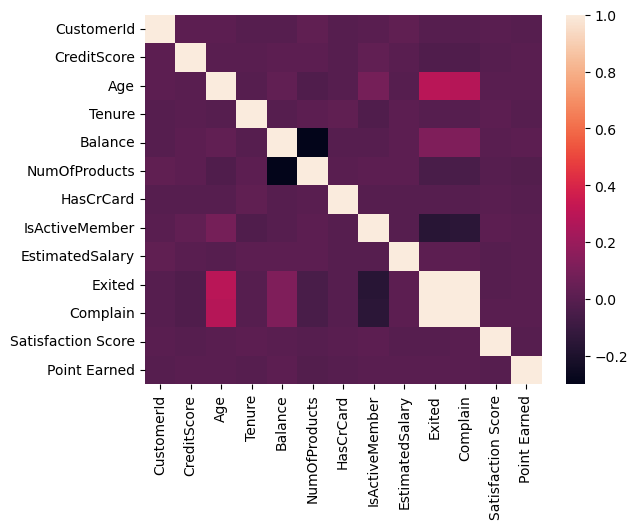

In [27]:
sns.heatmap(corr_table)

In [28]:
corr_table['Exited'].sort_values(ascending=False)

Exited                1.00
Complain              1.00
Age                   0.29
Balance               0.12
EstimatedSalary       0.01
Point Earned         -0.00
CustomerId           -0.01
Tenure               -0.01
HasCrCard            -0.01
Satisfaction Score   -0.01
CreditScore          -0.03
NumOfProducts        -0.05
IsActiveMember       -0.16
Name: Exited, dtype: float64

Анализ матрицы корреляций позволяет сделать вывод, что следует обратить внимание на Complain, Age, Balance, IsActiveMember. У остальных факторов наблюдается слабая линейная связь с переменной Exited.

# Выявляем важные факторы

## Категориальные переменные

### Geography

In [33]:
df.groupby('Geography')['Exited'].agg(['count', 'mean'])

,count,mean
Geography,,
France,5014,0.161747
Germany,2509,0.324432
Spain,2477,0.166734


<Axes: xlabel='Geography'>

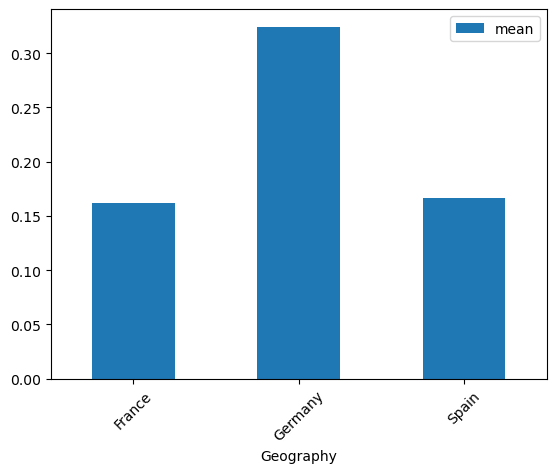

In [34]:
df.groupby('Geography')['Exited'].agg(['mean']).plot(kind = 'bar', rot=45)

Показатель оттока различается в разных странах. В Германии он составил 32.4%, во Франции - 16.2%, в Испании - 16.7%. Это значит, что страна проживания клиента может влиять на его уход из банка. Компании, в первую очередь, следует обратить внимание на клиентов из Германии.  

### Gender

In [37]:
df.groupby('Gender')['Exited'].agg(['count', 'mean'])

,count,mean
Gender,,
Female,4543,0.250715
Male,5457,0.164743


<Axes: xlabel='Gender'>

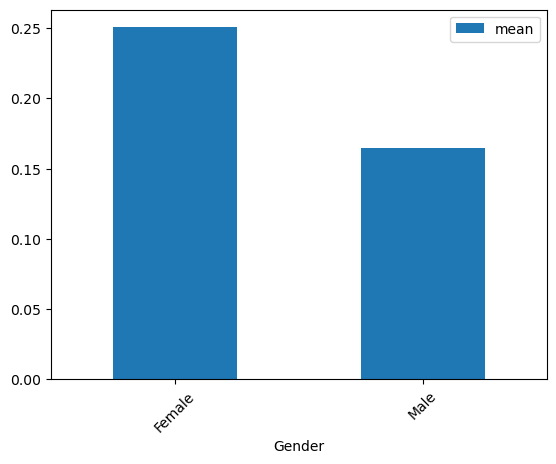

In [38]:
df.groupby('Gender')['Exited'].agg(['mean']).plot(kind = 'bar', rot=45)

Показатель оттока выше среди клиентов-женщин (25.1%) по сравнению с клиентами-мужчинами (16.5%). Это значит, что пол может играть роль в уходе клиента из банка. Клиенты женского пола более склонны к уходу.

### Complain

In [41]:
df.groupby('Complain')['Exited'].agg(['count', 'mean'])

,count,mean
Complain,,
0,7956,0.000503
1,2044,0.995108


Анализ сводной таблицы позволяет сделать вывод, что 99.5% клиентов, у которых была жалоба, ушли из банка. Т.е. если у клиента есть жалоба, то он скорее всего перестанет быть клиентом банка. При отсутствии жалоб вероятность ухода клиента очень низкая (0.05%). Компании следует обратить на это внимание. 

### Satisfaction Score

In [44]:
df.groupby('Satisfaction Score')['Exited'].agg(['count', 'mean'])

,count,mean
Satisfaction Score,,
1,1932,0.200311
2,2014,0.217974
3,2042,0.196376
4,2008,0.206175
5,2004,0.198104


Оценка клиента по результатам разрешения жалобы не влияет на уход клиента из банка, т.к. показатель ухода примерно одинаков для всех групп.

### IsActiveMember

In [47]:
df.groupby('IsActiveMember')['Exited'].agg(['count', 'mean'])

,count,mean
IsActiveMember,,
0,4849,0.268715
1,5151,0.142691


Статус активности клиента влияет на отток клиентов из банка. Неактивные клинты чаще покидают банк (26.8%) по сравнению с активными клиентами (14.3%).

### HasCrCard

In [50]:
df.groupby('HasCrCard')['Exited'].agg(['count', 'mean'])

,count,mean
HasCrCard,,
0,2945,0.208149
1,7055,0.201984


Наличие кредитной карты не влияет на отток клиентов из банка, т.к. покзаатель примерно одинаков для обеих групп (имеющих и неимеющих кредитную карту)

### NumOfProducts

In [53]:
df.groupby('NumOfProducts')['Exited'].agg(['count', 'mean'])

,count,mean
NumOfProducts,,
1,5084,0.277144
2,4590,0.076035
3,266,0.827068
4,60,1.000000


Количество продуктов, купленных клиентом через банк влияет на отток клиентов из банка. Здесь мы не можем сказать, что 3 и 4 купленных продукта сильно влияют на уход клиента, т.к. по ним очень мало данных (266 и 60 клиентов соответственно). Но можем сделать вывод, что вероятность ухода у клиентов с 1 продуктом (27.7%) выше, чем у клиентов с двумя продуктами (7.6%).

### Card Type

In [56]:
df.groupby('Card Type')['Exited'].agg(['count', 'mean'])

,count,mean
Card Type,,
DIAMOND,2507,0.217790
GOLD,2502,0.192646
PLATINUM,2495,0.203607
SILVER,2496,0.201122


Тип карты не влияет на отток клиентов из банка.

### Tenure

In [158]:
df.groupby('Tenure')['Exited'].agg(['count', 'mean'])

,count,mean
Tenure,,
0,413,0.230024
1,1035,0.224155
2,1048,0.191794
3,1009,0.211100
4,989,0.205258
5,1012,0.206522
6,967,0.202689
7,1028,0.172179
8,1025,0.192195


<Axes: xlabel='Tenure'>

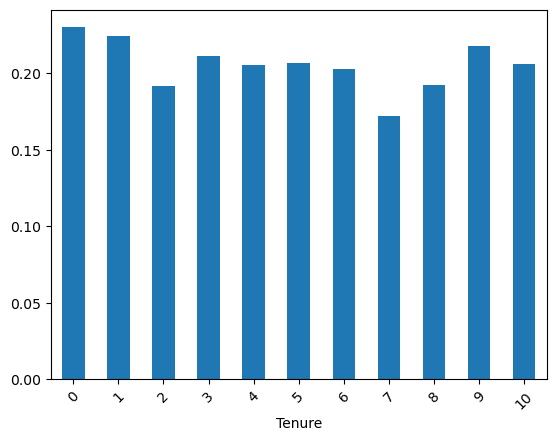

In [162]:
df.groupby('Tenure')['Exited'].agg(['mean']).plot(kind = 'bar', rot=45, legend=False)

Данный показатель примерно одинаков для всех групп, но ниже для 2 лет и 7 лет. Для понимания влияния этой переменной требуется дополнительный анализ.

## Общая визуализация

Text(0, 0.5, 'Mean')

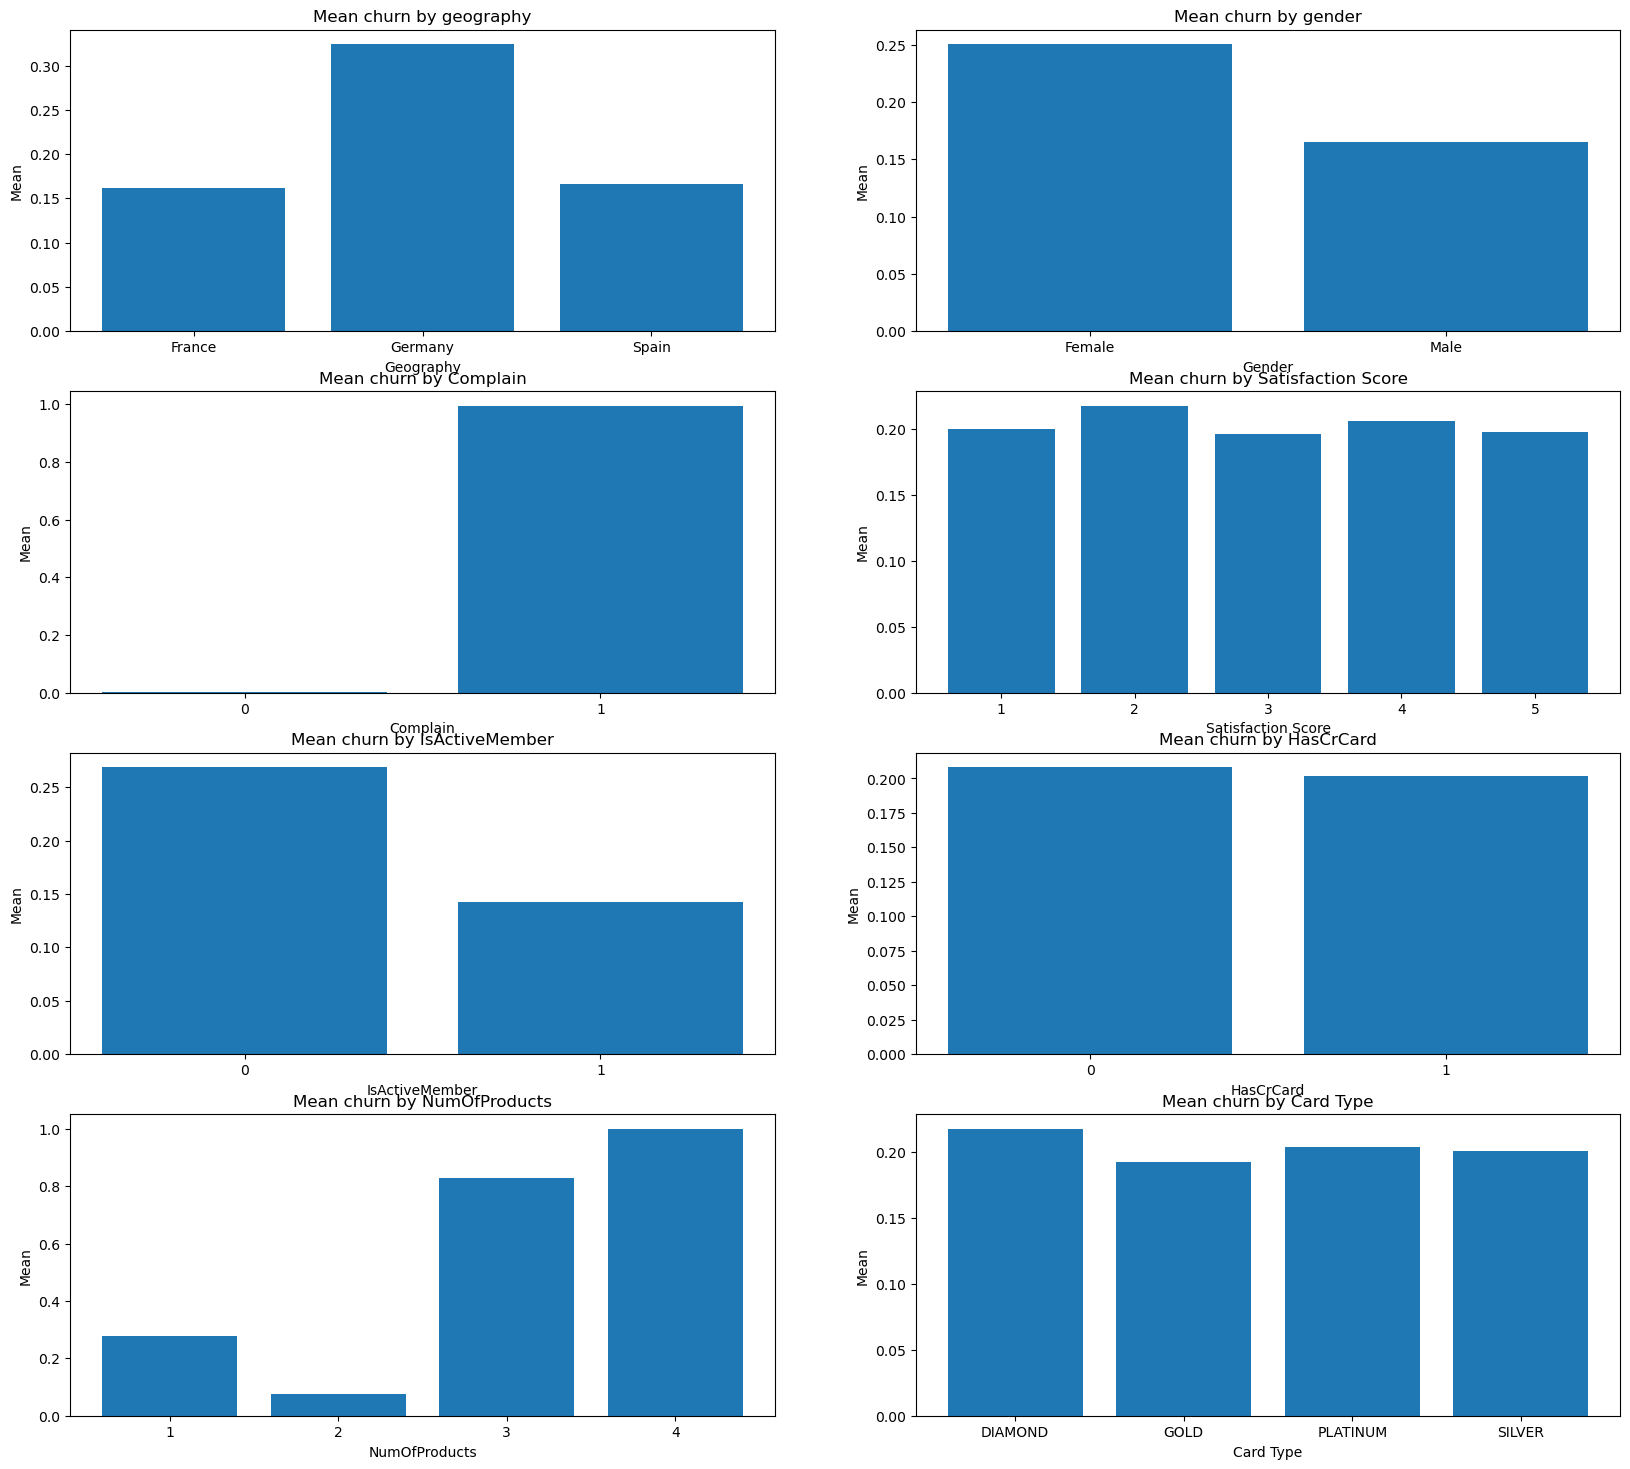

In [59]:
plt.figure(figsize = (20, 18))

plt.subplot(4, 2, 1)
Geography_mean = df.groupby('Geography')['Exited'].agg(['mean'])
plt.bar(Geography_mean.index, Geography_mean['mean'])
plt.title('Mean churn by geography')
plt.xlabel('Geography')
plt.ylabel('Mean')

plt.subplot(4, 2, 2)
Gender_mean = df.groupby('Gender')['Exited'].agg(['mean'])
plt.bar(Gender_mean.index, Gender_mean['mean'])
plt.title('Mean churn by gender')
plt.xlabel('Gender')
plt.ylabel('Mean')

plt.subplot(4, 2, 3)
Complain_mean = df.groupby('Complain')['Exited'].agg(['mean'])
plt.bar(Complain_mean.index.astype(str), Complain_mean['mean'])
plt.title('Mean churn by Complain')
plt.xlabel('Complain')
plt.ylabel('Mean')

plt.subplot(4, 2, 4)
Satisfaction_Score_mean = df.groupby('Satisfaction Score')['Exited'].agg(['mean'])
plt.bar(Satisfaction_Score_mean.index.astype(str), Satisfaction_Score_mean['mean'])
plt.title('Mean churn by Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Mean')

plt.subplot(4, 2, 5)
IsActiveMember_mean = df.groupby('IsActiveMember')['Exited'].agg(['count', 'mean'])
plt.bar(IsActiveMember_mean.index.astype(str), IsActiveMember_mean['mean'])
plt.title('Mean churn by IsActiveMember')
plt.xlabel('IsActiveMember')
plt.ylabel('Mean')

plt.subplot(4, 2, 6)
HasCrCard_mean = df.groupby('HasCrCard')['Exited'].agg(['count', 'mean'])
plt.bar(HasCrCard_mean.index.astype(str), HasCrCard_mean['mean'])
plt.title('Mean churn by HasCrCard')
plt.xlabel('HasCrCard')
plt.ylabel('Mean')

plt.subplot(4, 2, 7)
NumOfProducts_mean = df.groupby('NumOfProducts')['Exited'].agg(['count', 'mean'])
plt.bar(NumOfProducts_mean.index.astype(str), NumOfProducts_mean['mean'])
plt.title('Mean churn by NumOfProducts')
plt.xlabel('NumOfProducts')
plt.ylabel('Mean')

plt.subplot(4, 2, 8)
Card_Type_mean = df.groupby('Card Type')['Exited'].agg(['count', 'mean'])
plt.bar(Card_Type_mean.index, Card_Type_mean['mean'])
plt.title('Mean churn by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Mean')

## Непрерывные переменные

### Смотрим распределение непрерывных переменных

<Axes: xlabel='Point Earned', ylabel='Count'>

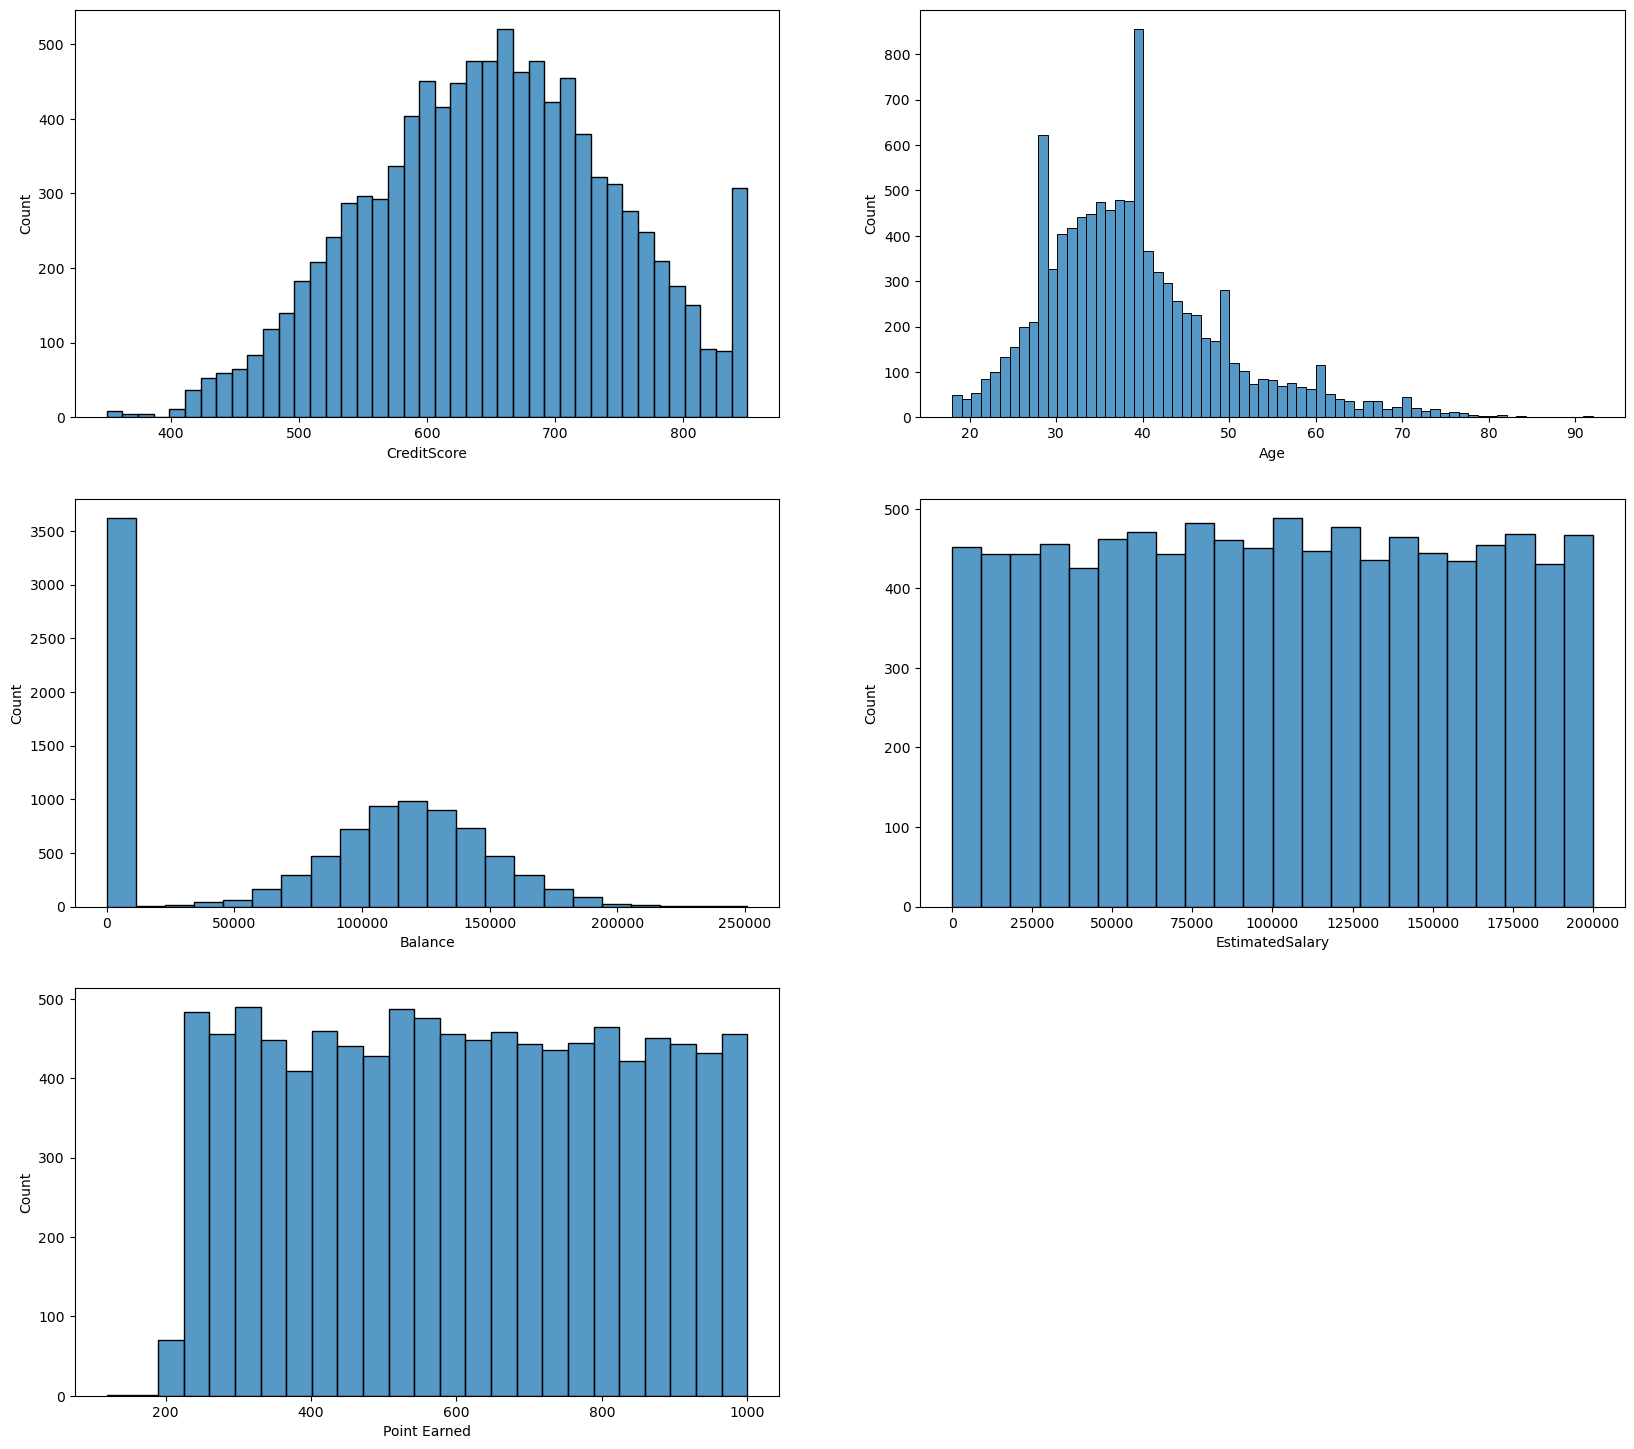

In [170]:
plt.figure(figsize = (20, 18))

plt.subplot(3, 2, 1)
sns.histplot(x = df['CreditScore'])

plt.subplot(3, 2, 2)
sns.histplot(x = df['Age'])

plt.subplot(3, 2, 3)
sns.histplot(x = df['Balance'])

plt.subplot(3, 2, 4)
sns.histplot(x = df['EstimatedSalary'])

plt.subplot(3, 2, 5)
sns.histplot(x = df['Point Earned'])

Таким образом, переменные EstimatedSalary и Point Earned имеют распределение, близкое к равномерному. Age и CreditScore - к нормальному. переменная Balance также имеет нормальное распределение, однако есть существенная доля тех, у кого баланс на счету равен 0. Таким образом, можно говорить об отсутствии серьезных выбросов и бисбаланса.

`Для анализа непрерывных переменных будем использовать функцию qcut. qcut - это функция, которая делит данные на заданное число интервалов, так чтобы в каждом интервале было примерно одинаковое количество наблюдений (если это возможно).`

### CreditScore

In [66]:
df['CreditScore_interval'] = pd.qcut(df['CreditScore'],5)

In [175]:
df.groupby('CreditScore_interval', observed=True)['Exited'].agg(['count', 'mean'])

,count,mean
CreditScore_interval,,
"(349.999, 566.0]",2010,0.224876
"(566.0, 627.0]",2020,0.208416
"(627.0, 678.0]",2010,0.196517
"(678.0, 735.0]",1981,0.183241
"(735.0, 850.0]",1979,0.205659


<Axes: xlabel='CreditScore_interval'>

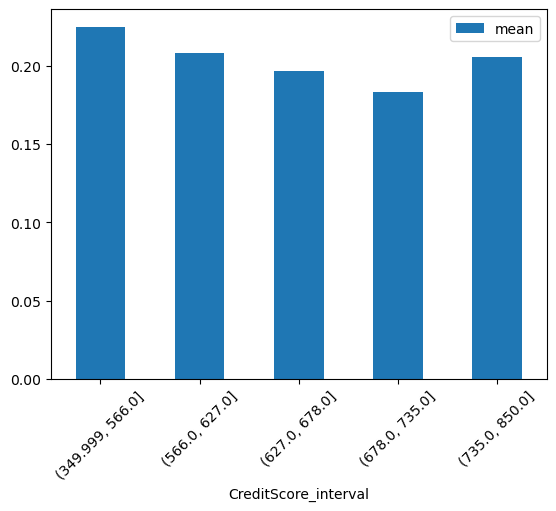

In [204]:
df.groupby('CreditScore_interval', observed=True)['Exited'].agg(['mean']).plot(kind = 'bar', rot=45)

На первый взгляд, кредитный рейтинг не влияет на отток клиентов из банка, данный показатель примерно одинаков для всех групп. Но также здесь наблюдается нелинейная взаимосвязь - клиенты с низким и высоким рейтингом больше склонны покидать банк, чем клиенты со средним рейтингом. Для понимания влияния этой переменной требуется дополнительный анализ. 

### Age

In [72]:
df['Age_interval'] = pd.qcut(df['Age'],5)

In [179]:
df.groupby('Age_interval', observed=True)['Exited'].agg(['count', 'mean'])

,count,mean
Age_interval,,
"(17.999, 31.0]",2372,0.076307
"(31.0, 35.0]",1781,0.093206
"(35.0, 40.0]",2266,0.150044
"(40.0, 46.0]",1696,0.285967
"(46.0, 92.0]",1885,0.459416


<Axes: xlabel='Age_interval'>

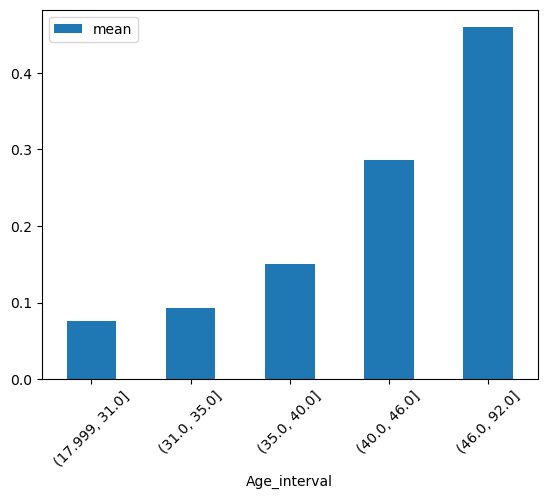

In [181]:
df.groupby('Age_interval', observed=True)['Exited'].agg(['mean']).plot(kind = 'bar', rot=45)

Возрастная группа клиента сильно влияет на показатель оттока. Из анализа видно, что с возрастом клиентов показатель оттока увеличивается. Это означает, что клиенты старшего возраста более склонны к уходу, в то время как молодые клиенты с большей вероятностью останутся в банке.

### Balance

In [84]:
df['Balance_interval'] = pd.qcut(df['Balance'],5, duplicates = 'drop')

In [183]:
df.groupby('Balance_interval', observed=True)['Exited'].agg(['count', 'mean'])

,count,mean
Balance_interval,,
"(-0.001, 73080.908]",4000,0.1475
"(73080.908, 110138.926]",2000,0.2235
"(110138.926, 133710.358]",2000,0.2695
"(133710.358, 250898.09]",2000,0.2310


<Axes: xlabel='Balance_interval'>

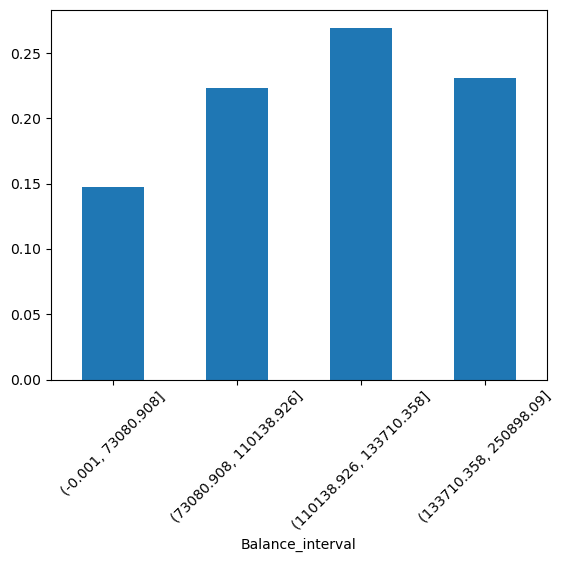

In [185]:
df.groupby('Balance_interval', observed=True)['Exited'].agg(['mean']).plot(kind = 'bar', rot=45, legend=False)

Баланс на счетах клиента влияет на отток клиентов из банка. Так, клиенты с низким балансом реже покидают банк (14.75%), чем с высоким балансом и средним балансом.

### EstimatedSalary

In [89]:
df['EstimatedSalary_interval'] = pd.qcut(df['EstimatedSalary'], 5)

In [187]:
df.groupby('EstimatedSalary_interval', observed=True)['Exited'].agg(['count', 'mean'])

,count,mean
EstimatedSalary_interval,,
"(11.579, 41050.736]",2000,0.1995
"(41050.736, 80238.34]",2000,0.1995
"(80238.34, 119710.038]",2000,0.2020
"(119710.038, 159836.726]",2000,0.2020
"(159836.726, 199992.48]",2000,0.2160


<Axes: xlabel='EstimatedSalary_interval'>

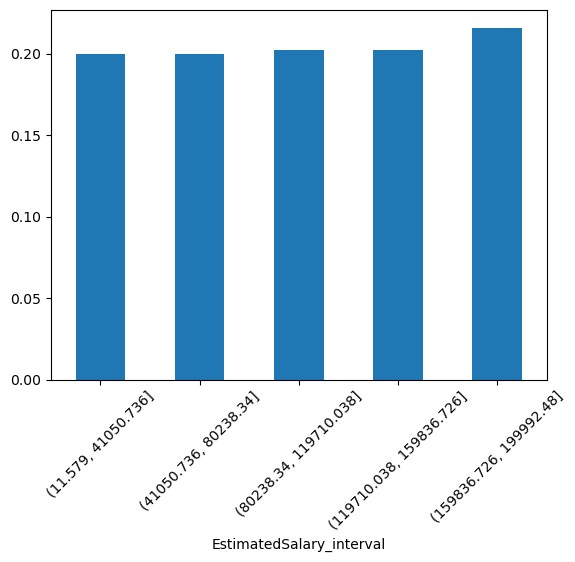

In [193]:
df.groupby('EstimatedSalary_interval', observed=True)['Exited'].agg(['mean']).plot(kind = 'bar', rot=45, legend=False)

Заработная плата клиентов не влияет на отток клиентов из банка.

### Point Earned

In [93]:
df['Point Earned_interval'] = pd.qcut(df['Point Earned'], 5)

In [189]:
df.groupby('Point Earned_interval', observed=True)['Exited'].agg(['count', 'mean'])

,count,mean
Point Earned_interval,,
"(118.999, 370.0]",2006,0.212363
"(370.0, 529.0]",2006,0.190429
"(529.0, 682.0]",1997,0.207311
"(682.0, 840.0]",1992,0.220382
"(840.0, 1000.0]",1999,0.188594


<Axes: xlabel='Point Earned_interval'>

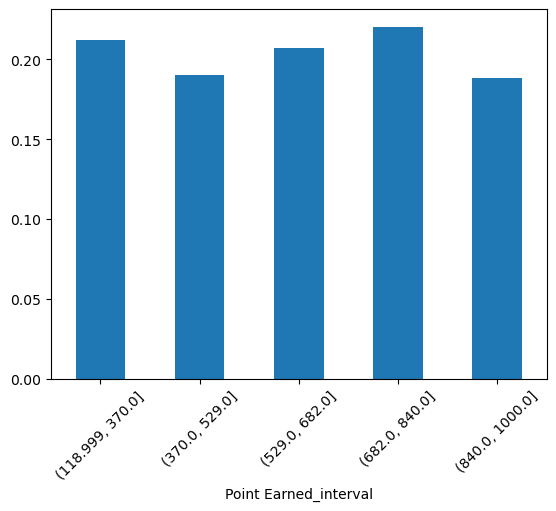

In [196]:
df.groupby('Point Earned_interval', observed=True)['Exited'].agg(['mean']).plot(kind = 'bar', rot=45, legend=False)

Количество баллов, начисленных клиенту за использование кредитной карты, не влиет на отток клиентов из банка.

## Общая визуализация

In [216]:
CreditScore_mean = df.groupby('CreditScore_interval', observed=True)['Exited'].agg(['mean'])
CreditScore_mean[['mean']]

,mean
CreditScore_interval,
"(349.999, 566.0]",0.224876
"(566.0, 627.0]",0.208416
"(627.0, 678.0]",0.196517
"(678.0, 735.0]",0.183241
"(735.0, 850.0]",0.205659


Text(0, 0.5, 'Mean')

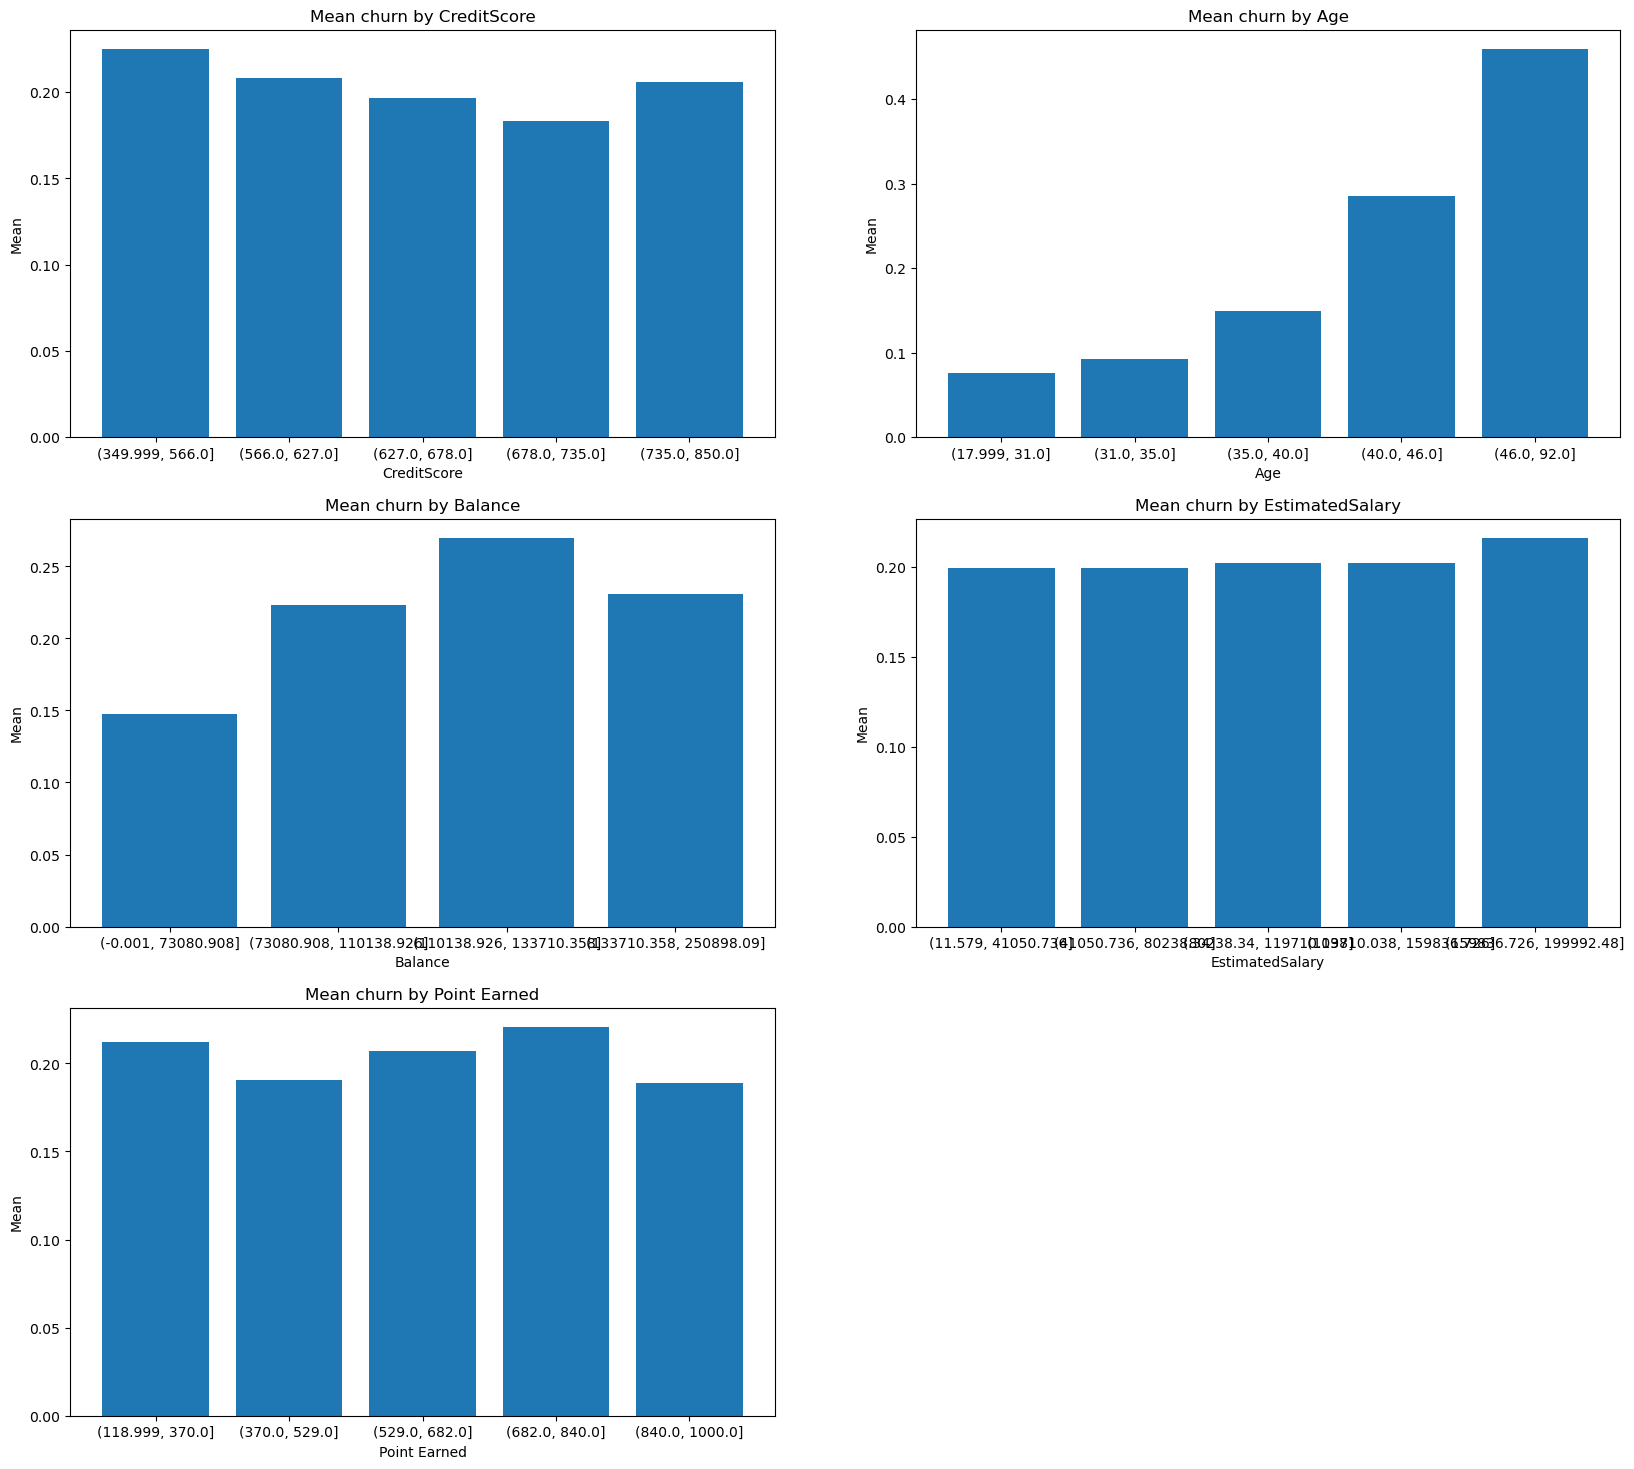

In [235]:
plt.figure(figsize = (20, 18))

plt.subplot(3, 2, 1)
CreditScore_mean = df.groupby('CreditScore_interval', observed=True)['Exited'].agg(['mean'])
plt.bar(CreditScore_mean.index.astype(str), CreditScore_mean['mean'])
plt.title('Mean churn by CreditScore')
plt.xlabel('CreditScore')
plt.ylabel('Mean')

plt.subplot(3, 2, 2)
Age_mean = df.groupby('Age_interval', observed=True)['Exited'].agg(['mean'])
plt.bar(Age_mean.index.astype(str), Age_mean['mean'])
plt.title('Mean churn by Age')
plt.xlabel('Age')
plt.ylabel('Mean')

plt.subplot(3, 2, 3)
Balance_mean = df.groupby('Balance_interval', observed=True)['Exited'].agg(['mean'])
plt.bar(Balance_mean.index.astype(str), Balance_mean['mean'])
plt.title('Mean churn by Balance')
plt.xlabel('Balance')
plt.ylabel('Mean')

plt.subplot(3, 2, 4)
EstimatedSalary_mean = df.groupby('EstimatedSalary_interval', observed=True)['Exited'].agg(['mean'])
plt.bar(EstimatedSalary_mean.index.astype(str), EstimatedSalary_mean['mean'])
plt.title('Mean churn by EstimatedSalary')
plt.xlabel('EstimatedSalary')
plt.ylabel('Mean')

plt.subplot(3, 2, 5)
Point_Earned_mean = df.groupby('Point Earned_interval', observed=True)['Exited'].agg(['mean'])
plt.bar(Point_Earned_mean.index.astype(str), Point_Earned_mean['mean'])
plt.title('Mean churn by Point Earned')
plt.xlabel('Point Earned')
plt.ylabel('Mean')

## Выводы

Таким образом, можно сделать вывод, что на отток клиентов из банка влияют следующие факторы:

- Geography (местоположение клиента). Показатель оттока различается в разных странах. В Германии он составил 32.4%, во Франции - 16.2%, в Испании - 16.7%. Это значит, что страна проживания клиента может влиять на его уход из банка. Компании, в первую очередь, следует обратить внимание на клиентов из Германии.
- Gender (пол клиента). Показатель оттока выше среди клиентов-женщин (25.1%) по сравнению с клиентами-мужчинами (16.5%). Это значит, что пол может играть роль в уходе клиента из банка. Клиенты женского пола более склонны к уходу.
- Complain (есть ли у клиента жалоба). 99.5% клиентов, у которых была жалоба, ушли из банка. Т.е. если у клиента есть жалоба, то он скорее всего перестанет быть клиентом банка. При отсутствии жалоб вероятность ухода клиента очень низкая (0.05%). Компании следует обратить на это внимание.
- IsActiveMember (Активные клиенты). Статус активности клиента влияет на отток клиентов из банка. Неактивные клинты чаще покидают банк (26.8%) по сравнению с активными клиентами (14.3%).
- NumOfProducts (количество продуктов, купленных клиентом через банк). Влияет на отток клиентов из банка. Мы не можем сказать, что 3 и 4 купленных продукта сильно влияют на уход клиента, т.к. по ним очень мало данных (266 и 60 клиентов соответственно). Но можем сделать вывод, что вероятность ухода у клиентов с 1 продуктом (27.7%) выше, чем у клиентов с двумя продуктами (7.6%).
- Age (возраст клиента). Возрастная группа клиента сильно влияет на показатель оттока. Из анализа видно, что с возрастом клиентов показатель оттока увеличивается. Это означает, что клиенты старшего возраста более склонны к уходу, в то время как молодые клиенты с большей вероятностью останутся в банке.
- Balance (Баланс на счетах клиента). Баланс на счетах клиента влияет на отток клиентов из банка. Так, клиенты с низким балансом реже покидают банк (14.75%), чем с высоким балансом и средним балансом.